<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/datawig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install datawig

     |████████████████████████████████| 13.8MB 305kB/s 
ERROR: xarray 0.18.0 has requirement numpy>=1.17, but you'll have numpy 1.14.6 which is incompatible.
ERROR: xarray 0.18.0 has requirement pandas>=1.0, but you'll have pandas 0.25.3 which is incompatible.
ERROR: tifffile 2021.4.8 has requirement numpy>=1.15.1, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.14.6 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: seaborn 0.11.1 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: pymc3 3.11.2 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: pyerfa 1.7.3 has requirement numpy>=1.16, but you'll have numpy 1.14.6 which is incompatible.
ERROR: pyarrow 3.0.0 has requirement numpy>=1.16.6, but you'll have numpy 1.14.6 which is incompatible.
ERROR: plot

In [99]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [100]:
path = '/gdrive/My Drive/'

In [101]:
import datawig
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [102]:
data = pd.read_csv(path + 'Copy of train.psv', sep='|')

In [103]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,99.0,100.0,NaN,NaN,71.0,NaN,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,2,0
1,97.5,100.0,NaN,NaN,NaN,NaN,15.0,NaN,-16.0,16.0,NaN,7.19,25.0,NaN,72.5,13.5,58.0,8.1,112.5,1.7,NaN,73.0,8.6,1.75,3.2,4.4,3.65,NaN,26.9,8.35,74.4,15.65,104.0,93.0,69.66,0,1.0,0.0,-0.02,3,0
2,96.0,100.0,NaN,NaN,70.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,4,0
3,100.0,99.0,NaN,NaN,75.0,NaN,14.0,NaN,-15.0,11.0,NaN,7.24,24.0,96.0,NaN,12.0,NaN,7.7,113.0,1.6,NaN,85.0,8.9,1.60,2.9,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,5,0
4,102.0,100.0,36.0,NaN,74.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.66,0,1.0,0.0,-0.02,6,0


In [104]:
cols = ['HR', 'O2Sat','Temp', 'SBP', 'MAP', 'DBP', 'Resp','Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS', 'SepsisLabel']

In [105]:
data = data[cols]

In [106]:
!pip install impyute

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from impyute.imputation.cs import fast_knn, mice

In [108]:
impute_mean=SimpleImputer(strategy='mean')
impute_mean.fit(data)
imputed_mean=impute_mean.transform(data)
imputed_mean=pd.DataFrame(imputed_mean,columns=data.columns)
imputed_mean.head(2)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,99.0,100.0,36.993541,122.800077,71.000000,62.805455,13.5,69.66,0.0,1.0,0.0,2.0,0.0
1,97.5,100.0,36.993541,122.800077,81.164234,62.805455,15.0,69.66,0.0,1.0,0.0,3.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


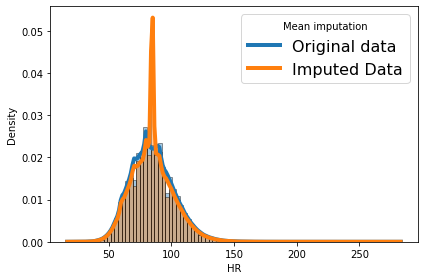

(None, None)

In [109]:
sns.distplot(data['HR'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

sns.distplot(imputed_mean['HR'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.legend(['Original data','Imputed Data'], prop={'size': 16}, title = 'Mean imputation')
plt.tight_layout(), plt.show()

In [110]:
impute_mode=SimpleImputer(strategy='most_frequent')
impute_mode.fit(data)
imputed_mode=impute_mode.transform(data)
imputed_mode=pd.DataFrame(imputed_mode,columns=data.columns)
imputed_mode.head(2)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,99.0,100.0,37.0,112.0,71.0,58.0,13.5,69.66,0.0,1.0,0.0,2.0,0.0
1,97.5,100.0,37.0,112.0,78.0,58.0,15.0,69.66,0.0,1.0,0.0,3.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


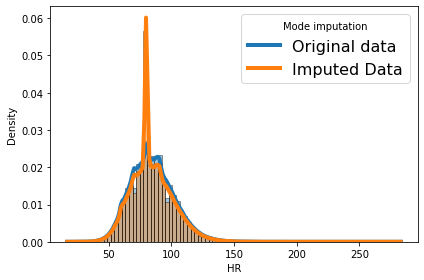

(None, None)

In [111]:
sns.distplot(data['HR'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

sns.distplot(imputed_mode['HR'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.legend(['Original data','Imputed Data'], prop={'size': 16}, title = 'Mode imputation')
plt.tight_layout(), plt.show()

In [112]:
#creating training and test data to apply regression model
train=data.dropna(axis=0,how='any')
test=data[(data['O2Sat'].notnull()) & 
          (data['SBP'].notnull()) & 
          (data['MAP'].notnull()) &
          (data['DBP'].notnull()) &
          (data['HR'].isnull())]

In [113]:
input_cols = ['O2Sat', 'SBP', 'MAP','DBP']
output_cols = 'HR'

model=datawig.SimpleImputer(input_columns=input_cols,
                            output_column=output_cols,
                            output_path = 'datawig_model'  #stores model data and metrics
)
model.fit(train_df=train,num_epochs=50)
y_pred=model.predict(test)

In [114]:
y_pred

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel,HR_imputed
1512,NaN,100.0,NaN,110.0,74.0,60.0,16.0,23.33,1,NaN,NaN,14,0,87.816785
5838,NaN,96.0,37.0,93.0,81.0,81.0,12.0,27.01,0,1.0,0.0,43,1,90.370902
8528,NaN,96.0,37.8,99.0,67.0,64.5,12.0,55.18,1,NaN,NaN,15,0,89.833322
11209,NaN,100.0,NaN,107.0,75.0,59.0,16.0,69.26,1,0.0,1.0,3,0,85.838557
11904,NaN,97.0,NaN,100.0,73.0,60.0,15.0,52.25,1,NaN,NaN,11,0,89.859775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153939,NaN,96.0,36.8,160.0,122.0,96.0,11.0,53.00,1,0.0,1.0,39,0,92.481441
1156018,NaN,97.0,NaN,172.0,113.0,91.0,18.0,58.00,1,NaN,NaN,2,0,91.777500
1163844,NaN,100.0,NaN,89.0,62.0,50.5,NaN,24.00,0,0.0,1.0,3,0,88.457959
1164672,NaN,99.0,NaN,94.0,70.0,56.0,20.0,62.00,0,NaN,NaN,2,0,87.703960


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


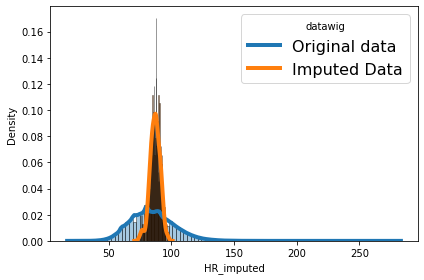

(None, None)

In [115]:
sns.distplot(data['HR'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

sns.distplot(y_pred['HR_imputed'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.legend(['Original data','Imputed Data'], prop={'size': 16}, title = 'datawig')
plt.tight_layout(), plt.show()

In [116]:
#creating training and test data to apply regression model
train=data.dropna(axis=0,how='any')
test=data[(data['HR'].notnull()) & 
          (data['SBP'].notnull()) & 
          (data['MAP'].notnull()) &
          (data['DBP'].notnull()) &
          (data['O2Sat'].isnull())]

In [117]:
input_cols = ['HR', 'SBP', 'MAP','DBP']
output_cols = 'O2Sat'

model=datawig.SimpleImputer(input_columns=input_cols,
                            output_column=output_cols,
                            output_path = 'datawig_model'  #stores model data and metrics
)
model.fit(train_df=train,num_epochs=50)
y_pred=model.predict(test)

In [118]:
y_pred

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel,O2Sat_imputed
36,87.0,NaN,37.17,125.0,80.0,56.0,19.0,69.66,0,1.0,0.0,38,0,97.710675
80,87.0,NaN,37.17,125.0,80.0,56.0,19.0,69.66,0,1.0,0.0,38,0,97.710675
435,78.0,NaN,36.22,153.0,92.0,70.0,19.0,74.89,1,NaN,NaN,22,0,97.560852
681,85.0,NaN,NaN,88.0,71.0,59.0,21.0,76.49,0,NaN,NaN,11,0,97.387906
690,94.0,NaN,36.72,91.0,75.0,63.0,21.0,76.49,0,NaN,NaN,20,0,97.330551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166416,86.0,NaN,37.30,115.0,86.0,71.0,18.0,69.00,1,1.0,0.0,24,0,97.749778
1166627,74.0,NaN,NaN,137.0,88.0,61.0,18.0,74.00,0,NaN,NaN,43,0,97.749778
1166629,75.0,NaN,38.10,138.0,89.0,62.0,25.0,74.00,0,NaN,NaN,45,0,97.749778
1166871,101.0,NaN,NaN,133.0,77.0,62.0,19.0,55.00,0,0.0,1.0,13,0,96.900885


In [119]:
#creating training and test data to apply regression model
train=data.dropna(axis=0,how='any')
test=data[(data['HR'].notnull()) & 
          (data['O2Sat'].notnull()) & 
          (data['MAP'].notnull()) &
          (data['DBP'].notnull()) &
          (data['SBP'].isnull())]

In [120]:
input_cols = ['HR', 'O2Sat', 'MAP','DBP']
output_cols = 'SBP'

model=datawig.SimpleImputer(input_columns=input_cols,
                            output_column=output_cols,
                            output_path = 'datawig_model'  #stores model data and metrics
)
model.fit(train_df=train,num_epochs=50)
y_pred=model.predict(test)

In [121]:
#creating training and test data to apply regression model
train=data.dropna(axis=0,how='any')
test=data[(data['HR'].notnull()) & 
          (data['O2Sat'].notnull()) & 
          (data['SBP'].notnull()) &
          (data['DBP'].notnull()) &
          (data['MAP'].isnull())]

In [122]:
input_cols = ['HR', 'O2Sat', 'SBP','DBP']
output_cols = 'MAP'

model=datawig.SimpleImputer(input_columns=input_cols,
                            output_column=output_cols,
                            output_path = 'datawig_model'  #stores model data and metrics
)
model.fit(train_df=train,num_epochs=50)
y_pred=model.predict(test)

In [123]:
#creating training and test data to apply regression model
train=data.dropna(axis=0,how='any')
test=data[(data['HR'].notnull()) & 
          (data['O2Sat'].notnull()) & 
          (data['SBP'].notnull()) &
          (data['MAP'].notnull()) &
          (data['DBP'].isnull())]

In [124]:
input_cols = ['HR', 'O2Sat', 'SBP','MAP']
output_cols = 'DBP'

model=datawig.SimpleImputer(input_columns=input_cols,
                            output_column=output_cols,
                            output_path = 'datawig_model'  #stores model data and metrics
)
model.fit(train_df=train,num_epochs=100)
y_pred=model.predict(test)

In [125]:
y_pred

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel,DBP_imputed
154,121.0,98.0,35.72,149.0,94.0,NaN,14.0,80.69,0,NaN,NaN,2,0,69.863936
155,112.0,97.0,NaN,98.0,64.0,NaN,13.0,80.69,0,NaN,NaN,3,0,50.083778
156,116.0,98.0,NaN,137.0,80.0,NaN,14.0,80.69,0,NaN,NaN,4,0,57.784225
157,111.0,97.0,NaN,90.0,59.0,NaN,11.0,80.69,0,NaN,NaN,5,0,46.810206
158,103.0,97.0,35.56,111.5,66.0,NaN,11.0,80.69,0,NaN,NaN,6,0,48.841977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145984,71.0,96.0,37.20,110.0,83.0,NaN,22.0,44.00,0,NaN,NaN,31,0,65.937452
1149929,76.0,100.0,36.50,166.0,164.0,NaN,14.0,66.00,0,NaN,NaN,4,0,115.386792
1159010,87.0,92.0,37.80,74.0,50.0,NaN,39.0,72.00,1,0.0,1.0,39,0,40.133821
1162925,62.5,98.5,36.40,88.0,53.0,NaN,15.5,51.00,0,NaN,NaN,12,0,39.591445


In [126]:
#creating training and test data to apply regression model
train=data.dropna(axis=0,how='any')
test=data[(data['HR'].notnull()) & 
          (data['O2Sat'].notnull()) & 
          (data['SBP'].notnull()) &
          (data['MAP'].notnull()) &
          (data['DBP'].notnull()) &
          (data['Temp'].isnull())]

In [127]:
input_cols = ['HR', 'O2Sat', 'SBP','MAP', 'DBP']
output_cols = 'Temp'

model=datawig.SimpleImputer(input_columns=input_cols,
                            output_column=output_cols,
                            output_path = 'datawig_model'  #stores model data and metrics
)
model.fit(train_df=train,num_epochs=50)
y_pred=model.predict(test)

In [128]:
#creating training and test data to apply regression model
train=data.dropna(axis=0,how='any')
test=data[(data['HR'].notnull()) & 
          (data['O2Sat'].notnull()) & 
          (data['SBP'].notnull()) &
          (data['MAP'].notnull()) &
          (data['DBP'].notnull()) &
          (data['Temp'].notnull()) &
          (data['Resp'].isnull())]

In [129]:
input_cols = ['HR', 'O2Sat', 'SBP','MAP', 'DBP', 'Temp']
output_cols = 'Resp'

model=datawig.SimpleImputer(input_columns=input_cols,
                            output_column=output_cols,
                            output_path = 'datawig_model'  #stores model data and metrics
)
model.fit(train_df=train,num_epochs=50)
y_pred=model.predict(test)

In [130]:
y_pred

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel,Resp_imputed
1386,92.5,100.0,37.20,156.5,85.0,63.0,NaN,76.56,1,0.0,1.0,38,0,17.617479
1887,86.0,93.0,36.78,102.0,88.0,85.0,NaN,61.20,1,NaN,NaN,14,0,19.539027
1891,88.0,96.0,37.17,133.0,87.0,65.0,NaN,61.20,1,NaN,NaN,18,0,19.300148
1893,82.0,94.0,37.89,75.0,73.0,67.0,NaN,61.20,1,NaN,NaN,20,0,18.929483
1895,88.0,95.0,38.06,151.0,88.0,61.0,NaN,61.20,1,NaN,NaN,22,0,20.851209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167003,70.5,99.0,36.95,106.0,68.0,47.0,NaN,79.00,1,0.0,1.0,8,0,16.669376
1167004,75.0,100.0,37.10,114.0,73.0,49.0,NaN,79.00,1,0.0,1.0,9,0,16.463942
1167014,84.0,99.5,37.35,117.0,73.5,51.0,NaN,79.00,1,0.0,1.0,19,0,17.489552
1167140,82.0,100.0,36.45,88.0,64.0,58.0,NaN,29.00,0,0.0,1.0,3,0,15.492184


In [131]:
y_pred.isnull().sum()

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp            12249
Age                 0
Gender              0
Unit1            2515
Unit2            2515
ICULOS              0
SepsisLabel         0
Resp_imputed        0
dtype: int64

In [132]:
y_pred['Resp']=y_pred['Resp_imputed']

In [133]:
y_pred

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel,Resp_imputed
1386,92.5,100.0,37.20,156.5,85.0,63.0,17.617479,76.56,1,0.0,1.0,38,0,17.617479
1887,86.0,93.0,36.78,102.0,88.0,85.0,19.539027,61.20,1,NaN,NaN,14,0,19.539027
1891,88.0,96.0,37.17,133.0,87.0,65.0,19.300148,61.20,1,NaN,NaN,18,0,19.300148
1893,82.0,94.0,37.89,75.0,73.0,67.0,18.929483,61.20,1,NaN,NaN,20,0,18.929483
1895,88.0,95.0,38.06,151.0,88.0,61.0,20.851209,61.20,1,NaN,NaN,22,0,20.851209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167003,70.5,99.0,36.95,106.0,68.0,47.0,16.669376,79.00,1,0.0,1.0,8,0,16.669376
1167004,75.0,100.0,37.10,114.0,73.0,49.0,16.463942,79.00,1,0.0,1.0,9,0,16.463942
1167014,84.0,99.5,37.35,117.0,73.5,51.0,17.489552,79.00,1,0.0,1.0,19,0,17.489552
1167140,82.0,100.0,36.45,88.0,64.0,58.0,15.492184,29.00,0,0.0,1.0,3,0,15.492184


In [134]:
y_pred.drop('Resp_imputed', axis=1, inplace=True)

In [135]:
y_pred

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
1386,92.5,100.0,37.20,156.5,85.0,63.0,17.617479,76.56,1,0.0,1.0,38,0
1887,86.0,93.0,36.78,102.0,88.0,85.0,19.539027,61.20,1,NaN,NaN,14,0
1891,88.0,96.0,37.17,133.0,87.0,65.0,19.300148,61.20,1,NaN,NaN,18,0
1893,82.0,94.0,37.89,75.0,73.0,67.0,18.929483,61.20,1,NaN,NaN,20,0
1895,88.0,95.0,38.06,151.0,88.0,61.0,20.851209,61.20,1,NaN,NaN,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167003,70.5,99.0,36.95,106.0,68.0,47.0,16.669376,79.00,1,0.0,1.0,8,0
1167004,75.0,100.0,37.10,114.0,73.0,49.0,16.463942,79.00,1,0.0,1.0,9,0
1167014,84.0,99.5,37.35,117.0,73.5,51.0,17.489552,79.00,1,0.0,1.0,19,0
1167140,82.0,100.0,36.45,88.0,64.0,58.0,15.492184,29.00,0,0.0,1.0,3,0


In [136]:
y_pred["Unit1"].fillna(y_pred['Unit1'].value_counts().idxmax(), inplace=True)
y_pred["Unit2"].fillna(y_pred['Unit2'].value_counts().idxmax(), inplace=True)

In [137]:
y_pred

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
1386,92.5,100.0,37.20,156.5,85.0,63.0,17.617479,76.56,1,0.0,1.0,38,0
1887,86.0,93.0,36.78,102.0,88.0,85.0,19.539027,61.20,1,0.0,1.0,14,0
1891,88.0,96.0,37.17,133.0,87.0,65.0,19.300148,61.20,1,0.0,1.0,18,0
1893,82.0,94.0,37.89,75.0,73.0,67.0,18.929483,61.20,1,0.0,1.0,20,0
1895,88.0,95.0,38.06,151.0,88.0,61.0,20.851209,61.20,1,0.0,1.0,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167003,70.5,99.0,36.95,106.0,68.0,47.0,16.669376,79.00,1,0.0,1.0,8,0
1167004,75.0,100.0,37.10,114.0,73.0,49.0,16.463942,79.00,1,0.0,1.0,9,0
1167014,84.0,99.5,37.35,117.0,73.5,51.0,17.489552,79.00,1,0.0,1.0,19,0
1167140,82.0,100.0,36.45,88.0,64.0,58.0,15.492184,29.00,0,0.0,1.0,3,0


In [138]:
y_pred.isnull().sum()

HR             0
O2Sat          0
Temp           0
SBP            0
MAP            0
DBP            0
Resp           0
Age            0
Gender         0
Unit1          0
Unit2          0
ICULOS         0
SepsisLabel    0
dtype: int64

In [139]:
X = y_pred.drop('SepsisLabel', 1)
y = y_pred['SepsisLabel']

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2376
           1       0.50      0.03      0.05        74

    accuracy                           0.97      2450
   macro avg       0.74      0.51      0.52      2450
weighted avg       0.96      0.97      0.96      2450



In [145]:
from imblearn.over_sampling import SMOTE

smote = SMOTE( random_state= 0 )

In [146]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote.shape, y_smote.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((19100, 12), (19100,))

In [147]:
X_smote_test, y_smote_test = smote.fit_resample(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [148]:
model_smote = RandomForestClassifier()
model_smote.fit(X_smote, y_smote)
preds_smote = model_smote.predict(X_smote_test)

In [149]:
print(classification_report(y_smote_test, preds_smote))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      2376
           1       0.98      0.44      0.61      2376

    accuracy                           0.72      4752
   macro avg       0.81      0.72      0.69      4752
weighted avg       0.81      0.72      0.69      4752



In [150]:
from sklearn.metrics import confusion_matrix
cf_matrix_smote = confusion_matrix(y_smote_test, preds_smote)
print(cf_matrix_smote)

[[2356   20]
 [1328 1048]]


In [151]:
rf_probs_smote = model.predict_proba(X_smote_test)

In [152]:
rf_probs_smote = rf_probs_smote[:, 1]

In [153]:
from sklearn.metrics import roc_auc_score

# calculate scores
rf_smote_auc = roc_auc_score(y_smote_test, rf_probs_smote)


print('Random Forest_smote: ROC AUC= {} %'.format(round(rf_smote_auc, 3)*100))

Random Forest_smote: ROC AUC= 66.4 %


In [154]:
from sklearn.metrics import roc_curve

In [155]:
rf_fpr, rf_tpr, rf_thres = roc_curve(y_smote_test, rf_probs_smote)

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [157]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
fold.get_n_splits(X_smote, y_smote)

5

In [158]:
parameters = {'solver':('newton-cg', 'liblinear'), 'C':[0.001]}

model = LogisticRegression(penalty='l2', n_jobs = -2, max_iter=1000)
log_reg = GridSearchCV(model, parameters, n_jobs= -2, cv=fold)

log_reg.fit(X_smote, y_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001], 'solver': ('newton-cg', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [159]:
yt_pred_log_reg = log_reg.predict(X_smote_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_smote_test, yt_pred_log_reg ))

ac= accuracy_score(y_smote_test, yt_pred_log_reg)
print('test_accuracy = {} % '.format(ac * 100))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68      2376
           1       0.68      0.47      0.56      2376

    accuracy                           0.63      4752
   macro avg       0.64      0.63      0.62      4752
weighted avg       0.64      0.63      0.62      4752

test_accuracy = 62.58417508417509 % 


In [160]:
cf_matrix = confusion_matrix(y_smote_test, yt_pred_log_reg)
print(cf_matrix)

[[1854  522]
 [1256 1120]]


In [161]:
logreg_probs = log_reg.predict_proba(X_smote_test)

In [162]:
logreg_probs = logreg_probs[:, 1]

In [163]:
logreg_auc = roc_auc_score(y_smote_test, logreg_probs)

In [164]:
print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))

Logistic: ROC AUC= 70.8 %


In [165]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
logreg_fpr, logreg_tpr, lr_thres = roc_curve(y_smote_test, logreg_probs)

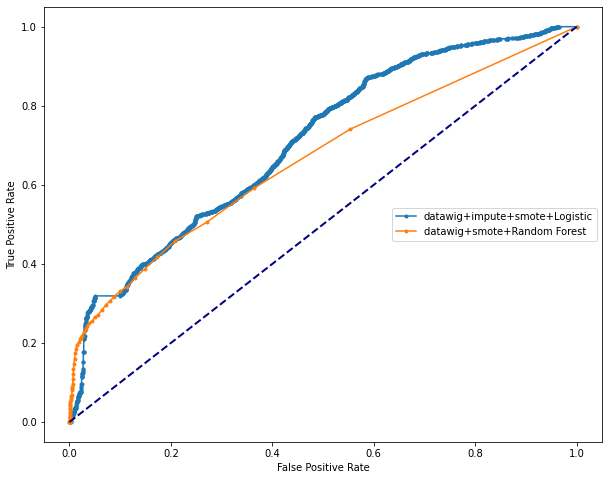

In [166]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='datawig+impute+smote+Logistic')
ax.plot(rf_fpr, rf_tpr, marker='.', label='datawig+smote+Random Forest')
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

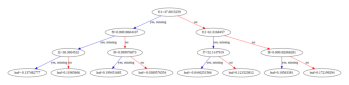

<Figure size 3600x3960 with 0 Axes>

In [167]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()

# Train
model.fit(X_smote, y_smote)

plot_tree(model)
plt.figure(figsize = (50,55))
plt.show()

In [168]:
y_pred_xgb= model.predict(X_smote_test)

from sklearn.metrics import classification_report
print(classification_report(y_smote_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      2376
           1       0.88      0.66      0.75      2376

    accuracy                           0.78      4752
   macro avg       0.80      0.78      0.78      4752
weighted avg       0.80      0.78      0.78      4752



In [169]:
cf_matrix = confusion_matrix(y_smote_test, y_pred_xgb)
print(cf_matrix)

[[2159  217]
 [ 805 1571]]


In [170]:
model_probs = model.predict_proba(X_smote_test)
model_probs = model_probs[:, 1]
model_auc = roc_auc_score(y_smote_test, model_probs)

print('XGBoost - ROC AUC= {} %'.format(round(model_auc, 3)*100))

XGBoost - ROC AUC= 88.6 %


In [171]:
model_fpr, model_tpr, model_thres = roc_curve(y_smote_test, model_probs)

In [172]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_smote, y_smote)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [173]:
y_pred_clf= clf.predict(X_smote_test)

from sklearn.metrics import classification_report
print(classification_report(y_smote_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      2376
           1       0.86      0.74      0.80      2376

    accuracy                           0.81      4752
   macro avg       0.82      0.81      0.81      4752
weighted avg       0.82      0.81      0.81      4752



In [174]:
cf_matrix = confusion_matrix(y_smote_test, y_pred_clf)
print(cf_matrix)

[[2098  278]
 [ 619 1757]]


In [175]:
clf_probs = clf.predict_proba(X_smote_test)
clf_probs = clf_probs[:, 1]
clf_auc = roc_auc_score(y_smote_test, clf_probs)

print('ADABOOST - ROC AUC= {} %'.format(round(clf_auc, 3)*100))

ADABOOST - ROC AUC= 88.7 %


In [176]:
clf_fpr, clf_tpr, clf_thres = roc_curve(y_smote_test, clf_probs)

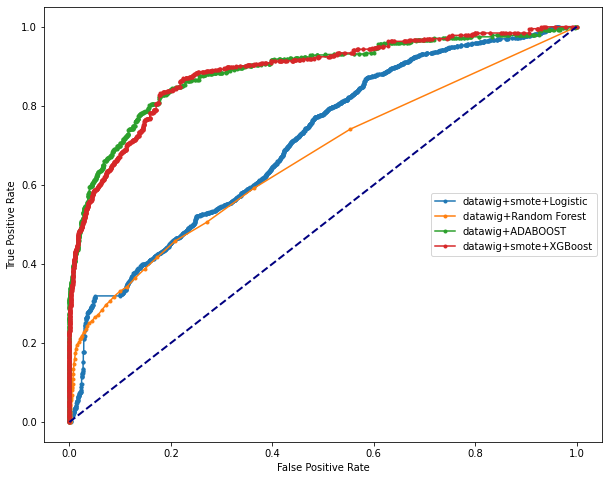

In [177]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='datawig+smote+Logistic')
ax.plot(rf_fpr, rf_tpr, marker='.', label='datawig+Random Forest')
ax.plot(clf_fpr, clf_tpr, marker='.', label='datawig+ADABOOST')
ax.plot(model_fpr, model_tpr, marker = '.', label='datawig+smote+XGBoost')
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

In [179]:
print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))
print('RF - ROC AUC= {} %'.format(round(rf_smote_auc, 3)*100))
print('ADABOOST - ROC AUC= {} %'.format(round(clf_auc, 3)*100))
print('XGBoost - ROC AUC= {} %'.format(round(model_auc, 3)*100))

Logistic: ROC AUC= 70.8 %
RF - ROC AUC= 66.4 %
ADABOOST - ROC AUC= 88.7 %
XGBoost - ROC AUC= 88.6 %
